### Speed Dating Dataset Quick Cleaning/Preprocessing/EDA
- There were some issues with the final dataset for modeling that need to be addressed 

In [2]:
import pandas as pd

# Loading File
file_path = r"C:\Users\samue\OneDrive\Data Science and Analytics\Data 534\Data 534 Machine Learning Project\Datasets\Speed_Dating\Speed Dating Data.csv"

df_speed_dating = pd.read_csv(file_path, encoding='ISO-8859-1')

# Display basic info and preview
print("Dataset loaded successfully!")
print(df_speed_dating.info())
df_speed_dating.head()

Dataset loaded successfully!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Columns: 195 entries, iid to amb5_3
dtypes: float64(174), int64(13), object(8)
memory usage: 12.5+ MB
None


,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


**Intially when I  had done the cleaning for the Speed Dating dataset, there were important features removed that I deemed important to the relevanve of compatability. I decided to go through each and every feature in the dataset and determine whether they should be kept. I created a seperate excel file for the feature, and will keep only those.**

In [3]:
import pandas as pd

# Load the attribute key file
file_path_attributes = r"C:\Users\samue\OneDrive\Data Science and Analytics\Data 534\Data 534 Machine Learning Project\Datasets\Speed_Dating\Speed Dating Dataset Key Excel.xlsx"

df_attributes = pd.read_excel(file_path_attributes, sheet_name="Sheet1")

# Get columns to keep based on the "Keep Feature?" column
columns_to_keep = df_attributes[df_attributes["Keep Feature?"] == "Yes"]["Feature:"].tolist()

print(columns_to_keep)
print(len(columns_to_keep))

['iid', 'gender', 'pid', 'match', 'int_corr', 'samerace', 'age_o', 'race_o', 'attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o', 'met_o', 'age', 'race', 'imprace', 'imprelig', 'go_out', 'sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tvsports', 'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga', 'attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'met']
44


In [4]:
# Drop unnecessary columns from the Speed Dating dataset
df_speed_dating_cleaned = df_speed_dating[columns_to_keep]

# Display the new shape and first few rows
print(f"Cleaned dataset now has {df_speed_dating_cleaned.shape[1]} columns.")
print(df_speed_dating_cleaned.head())
print(df_speed_dating_cleaned.info)

Cleaned dataset now has 44 columns.
   iid  gender   pid  match  int_corr  samerace  age_o  race_o  attr_o  \
0    1       0  11.0      0      0.14         0   27.0     2.0     6.0   
1    1       0  12.0      0      0.54         0   22.0     2.0     7.0   
2    1       0  13.0      1      0.16         1   22.0     4.0    10.0   
3    1       0  14.0      1      0.61         0   23.0     2.0     7.0   
4    1       0  15.0      1      0.21         0   24.0     3.0     8.0   

   sinc_o  ...  music  shopping  yoga  attr  sinc  intel  fun  amb  shar  met  
0     8.0  ...    9.0       8.0   1.0   6.0   9.0    7.0  7.0  6.0   5.0  2.0  
1     8.0  ...    9.0       8.0   1.0   7.0   8.0    7.0  8.0  5.0   6.0  1.0  
2    10.0  ...    9.0       8.0   1.0   5.0   8.0    9.0  8.0  5.0   7.0  1.0  
3     8.0  ...    9.0       8.0   1.0   7.0   6.0    8.0  7.0  6.0   8.0  2.0  
4     7.0  ...    9.0       8.0   1.0   5.0   6.0    7.0  7.0  6.0   6.0  2.0  

[5 rows x 44 columns]
<bound method Da

In [5]:
# shows missing values in dataset
missing_values = df_speed_dating_cleaned.isnull().sum()
print("Missing Values Per Column:\n", missing_values[missing_values > 0])

Missing Values Per Column:
 pid           10
int_corr     158
age_o        104
race_o        73
attr_o       212
sinc_o       287
intel_o      306
fun_o        360
amb_o        722
shar_o      1076
met_o        385
age           95
race          63
imprace       79
imprelig      79
go_out        79
sports        79
tvsports      79
exercise      79
dining        79
museums       79
art           79
hiking        79
gaming        79
clubbing      79
reading       79
tvsports      79
theater       79
movies        79
concerts      79
music         79
shopping      79
yoga          79
attr         202
sinc         277
intel        296
fun          350
amb          712
shar        1067
met          375
dtype: int64


Every participant (iid) is paired with a unique partner (pid) in one row, and then vice versa in another row.
This means the dataset has duplicate relationships.
- Options:
- Keep both rows (treat as independent ratings).

**Handling Missing Values**
- Since attr, sinc, intel, fun, amb and shar are key to our analysis we'll keep these and impute using the median


In [7]:
# Fill missing values for rating-related columns with the median
rating_columns = ["attr_o", "sinc_o", "intel_o", "fun_o", "amb_o", "shar_o",
                  "attr", "sinc", "intel", "fun", "amb", "shar"]

for col in rating_columns:
    df_speed_dating_cleaned[col].fillna(df_speed_dating_cleaned[col].median(), inplace=True)

# Drop rows where 'pid' is missing
df_speed_dating_cleaned = df_speed_dating_cleaned.dropna(subset=["pid"])

# Display dataset shape after handling missing values
print(f"Dataset now has {df_speed_dating_cleaned.shape[0]} rows and {df_speed_dating_cleaned.shape[1]} columns.")
df_speed_dating_cleaned.head()

Dataset now has 8368 rows and 44 columns.


C:\Users\samue\AppData\Local\Temp\ipykernel_47464\2103322312.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_speed_dating_cleaned[col].fillna(df_speed_dating_cleaned[col].median(), inplace=True)
C:\Users\samue\AppData\Local\Temp\ipykernel_47464\2103322312.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_speed_dating_cleaned[col].f

,iid,gender,pid,match,int_corr,samerace,age_o,race_o,attr_o,sinc_o,...,music,shopping,yoga,attr,sinc,intel,fun,amb,shar,met
0,1,0,11.0,0,0.14,0,27.0,2.0,6.0,8.0,...,9.0,8.0,1.0,6.0,9.0,7.0,7.0,6.0,5.0,2.0
1,1,0,12.0,0,0.54,0,22.0,2.0,7.0,8.0,...,9.0,8.0,1.0,7.0,8.0,7.0,8.0,5.0,6.0,1.0
2,1,0,13.0,1,0.16,1,22.0,4.0,10.0,10.0,...,9.0,8.0,1.0,5.0,8.0,9.0,8.0,5.0,7.0,1.0
3,1,0,14.0,1,0.61,0,23.0,2.0,7.0,8.0,...,9.0,8.0,1.0,7.0,6.0,8.0,7.0,6.0,8.0,2.0
4,1,0,15.0,1,0.21,0,24.0,3.0,8.0,7.0,...,9.0,8.0,1.0,5.0,6.0,7.0,7.0,6.0,6.0,2.0


In [8]:
# shows remaing missing values
missing_values = df_speed_dating_cleaned.isnull().sum()
print("Missing Values Per Column:\n", missing_values[missing_values > 0])

Missing Values Per Column:
 int_corr    158
age_o        94
race_o       63
met_o       375
age          94
race         63
imprace      79
imprelig     79
go_out       79
sports       79
tvsports     79
exercise     79
dining       79
museums      79
art          79
hiking       79
gaming       79
clubbing     79
reading      79
tvsports     79
theater      79
movies       79
concerts     79
music        79
shopping     79
yoga         79
met         375
dtype: int64


In [9]:
df_speed_dating_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8368 entries, 0 to 8377
Data columns (total 44 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   iid       8368 non-null   int64  
 1   gender    8368 non-null   int64  
 2   pid       8368 non-null   float64
 3   match     8368 non-null   int64  
 4   int_corr  8210 non-null   float64
 5   samerace  8368 non-null   int64  
 6   age_o     8274 non-null   float64
 7   race_o    8305 non-null   float64
 8   attr_o    8368 non-null   float64
 9   sinc_o    8368 non-null   float64
 10  intel_o   8368 non-null   float64
 11  fun_o     8368 non-null   float64
 12  amb_o     8368 non-null   float64
 13  shar_o    8368 non-null   float64
 14  met_o     7993 non-null   float64
 15  age       8274 non-null   float64
 16  race      8305 non-null   float64
 17  imprace   8289 non-null   float64
 18  imprelig  8289 non-null   float64
 19  go_out    8289 non-null   float64
 20  sports    8289 non-null   float64
 

In [10]:
# Drop 'met' and 'met_o' columns
df_speed_dating_cleaned.drop(columns=["met", "met_o"], inplace=True)

# Fill numerical missing values with median
numerical_fill = ["int_corr", "age_o", "age", "imprace", "imprelig", "go_out"]
for col in numerical_fill:
    df_speed_dating_cleaned[col] = df_speed_dating_cleaned[col].fillna(df_speed_dating_cleaned[col].median())

# Fill categorical missing values with mode 
categorical_fill = ["race_o", "race"]
for col in categorical_fill:
    df_speed_dating_cleaned[col] = df_speed_dating_cleaned[col].fillna(df_speed_dating_cleaned[col].mode()[0])

# Fill activity preference columns (continuous values) with median
activity_cols = ["sports", "tvsports", "exercise", "dining", "museums", "art", 
                 "hiking", "gaming", "clubbing", "reading", "theater", "movies", 
                 "concerts", "music", "shopping", "yoga"]
for col in activity_cols:
    df_speed_dating_cleaned[col] = df_speed_dating_cleaned[col].fillna(df_speed_dating_cleaned[col].median())

# Confirm all missing values are handled
print("Remaining Missing Values:\n", df_speed_dating_cleaned.isnull().sum().sum())

# Display updated dataset
print(f"Dataset now has {df_speed_dating_cleaned.shape[1]} columns after handling missing values.")
df_speed_dating_cleaned.head()

Remaining Missing Values:
 0
Dataset now has 42 columns after handling missing values.


C:\Users\samue\AppData\Local\Temp\ipykernel_47464\2917322806.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_speed_dating_cleaned.drop(columns=["met", "met_o"], inplace=True)
C:\Users\samue\AppData\Local\Temp\ipykernel_47464\2917322806.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_speed_dating_cleaned[col] = df_speed_dating_cleaned[col].fillna(df_speed_dating_cleaned[col].median())
C:\Users\samue\AppData\Local\Temp\ipykernel_47464\2917322806.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

,iid,gender,pid,match,int_corr,samerace,age_o,race_o,attr_o,sinc_o,...,concerts,music,shopping,yoga,attr,sinc,intel,fun,amb,shar
0,1,0,11.0,0,0.14,0,27.0,2.0,6.0,8.0,...,10.0,9.0,8.0,1.0,6.0,9.0,7.0,7.0,6.0,5.0
1,1,0,12.0,0,0.54,0,22.0,2.0,7.0,8.0,...,10.0,9.0,8.0,1.0,7.0,8.0,7.0,8.0,5.0,6.0
2,1,0,13.0,1,0.16,1,22.0,4.0,10.0,10.0,...,10.0,9.0,8.0,1.0,5.0,8.0,9.0,8.0,5.0,7.0
3,1,0,14.0,1,0.61,0,23.0,2.0,7.0,8.0,...,10.0,9.0,8.0,1.0,7.0,6.0,8.0,7.0,6.0,8.0
4,1,0,15.0,1,0.21,0,24.0,3.0,8.0,7.0,...,10.0,9.0,8.0,1.0,5.0,6.0,7.0,7.0,6.0,6.0


In [11]:
df_speed_dating_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8368 entries, 0 to 8377
Data columns (total 42 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   iid       8368 non-null   int64  
 1   gender    8368 non-null   int64  
 2   pid       8368 non-null   float64
 3   match     8368 non-null   int64  
 4   int_corr  8368 non-null   float64
 5   samerace  8368 non-null   int64  
 6   age_o     8368 non-null   float64
 7   race_o    8368 non-null   float64
 8   attr_o    8368 non-null   float64
 9   sinc_o    8368 non-null   float64
 10  intel_o   8368 non-null   float64
 11  fun_o     8368 non-null   float64
 12  amb_o     8368 non-null   float64
 13  shar_o    8368 non-null   float64
 14  age       8368 non-null   float64
 15  race      8368 non-null   float64
 16  imprace   8368 non-null   float64
 17  imprelig  8368 non-null   float64
 18  go_out    8368 non-null   float64
 19  sports    8368 non-null   float64
 20  tvsports  8368 non-null   float64
 

### Feature Engineering
- Create "Attractiveness Difference" Feature
    - Measures how different a person’s attractiveness rating is from their partner’s rating of them.
    - Helps analyze whether similar attraction scores impact matches.
- Create "Overall Rating Difference" Feature
    - Combines all six rating attributes (attr_o, sinc_o, intel_o, fun_o, amb_o, shar_o).
    - Measures whether big rating differences influence matches.

In [13]:
# Create "Attractiveness Difference" Feature
df_speed_dating_cleaned["attr_diff"] = abs(df_speed_dating_cleaned["attr"] - df_speed_dating_cleaned["attr_o"])

# Create "Overall Rating Difference" Feature
df_speed_dating_cleaned["rating_diff"] = (
    abs(df_speed_dating_cleaned["attr"] - df_speed_dating_cleaned["attr_o"]) +
    abs(df_speed_dating_cleaned["sinc"] - df_speed_dating_cleaned["sinc_o"]) +
    abs(df_speed_dating_cleaned["intel"] - df_speed_dating_cleaned["intel_o"]) +
    abs(df_speed_dating_cleaned["fun"] - df_speed_dating_cleaned["fun_o"]) +
    abs(df_speed_dating_cleaned["amb"] - df_speed_dating_cleaned["amb_o"]) +
    abs(df_speed_dating_cleaned["shar"] - df_speed_dating_cleaned["shar_o"])
)

# Display new dataset shape
print(f"Dataset now has {df_speed_dating_cleaned.shape[1]} columns after feature engineering.")
print(df_speed_dating_cleaned.head())
print(df_speed_dating_cleaned.info())

Dataset now has 44 columns after feature engineering.
   iid  gender   pid  match  int_corr  samerace  age_o  race_o  attr_o  \
0    1       0  11.0      0      0.14         0   27.0     2.0     6.0   
1    1       0  12.0      0      0.54         0   22.0     2.0     7.0   
2    1       0  13.0      1      0.16         1   22.0     4.0    10.0   
3    1       0  14.0      1      0.61         0   23.0     2.0     7.0   
4    1       0  15.0      1      0.21         0   24.0     3.0     8.0   

   sinc_o  ...  shopping  yoga  attr  sinc  intel  fun  amb  shar  attr_diff  \
0     8.0  ...       8.0   1.0   6.0   9.0    7.0  7.0  6.0   5.0        0.0   
1     8.0  ...       8.0   1.0   7.0   8.0    7.0  8.0  5.0   6.0        0.0   
2    10.0  ...       8.0   1.0   5.0   8.0    9.0  8.0  5.0   7.0        5.0   
3     8.0  ...       8.0   1.0   7.0   6.0    8.0  7.0  6.0   8.0        0.0   
4     7.0  ...       8.0   1.0   5.0   6.0    7.0  7.0  6.0   6.0        3.0   

   rating_diff  
0  

### Dimensionality Reduction
- Since we have many activity preference features, we can reduce dimensionality:
- Use PCA to summarize sports, clubbing, movies, concerts, shopping, yoga, etc. into fewer components.

In [26]:
from sklearn.decomposition import PCA
import numpy as np

# Select activity preference features
activity_features = ["sports", "tvsports", "exercise", "dining", "museums", "art", 
                     "hiking", "gaming", "clubbing", "reading", "theater", "movies", 
                     "concerts", "music", "shopping", "yoga"]

# Apply PCA to reduce dimensionality to 3 components
pca = PCA(n_components=3)
activity_pca = pca.fit_transform(df_speed_dating_cleaned[activity_features])

# Add PCA components as new columns
df_speed_dating_cleaned["activity_pca_1"] = activity_pca[:, 0]
df_speed_dating_cleaned["activity_pca_2"] = activity_pca[:, 1]
df_speed_dating_cleaned["activity_pca_3"] = activity_pca[:, 2]

# Drop original activity columns
df_speed_dating_cleaned.drop(columns=activity_features, inplace=True)

# Display new dataset structure
print(f"Dataset now has {df_speed_dating_cleaned.shape[1]} columns after PCA.")
df_speed_dating_cleaned.head()

Dataset now has 30 columns after PCA.


,iid,gender,pid,match,int_corr,samerace,age_o,race_o,attr_o,sinc_o,...,sinc,intel,fun,amb,shar,attr_diff,rating_diff,activity_pca_1,activity_pca_2,activity_pca_3
0,1,0,11.0,0,0.14,0,27.0,2.0,6.0,8.0,...,9.0,7.0,7.0,6.0,5.0,0.0,6.0,1.879624,-5.680951,-1.044875
1,1,0,12.0,0,0.54,0,22.0,2.0,7.0,8.0,...,8.0,7.0,8.0,5.0,6.0,0.0,7.0,1.879624,-5.680951,-1.044875
2,1,0,13.0,1,0.16,1,22.0,4.0,10.0,10.0,...,8.0,9.0,8.0,5.0,7.0,5.0,18.0,1.879624,-5.680951,-1.044875
3,1,0,14.0,1,0.61,0,23.0,2.0,7.0,8.0,...,6.0,8.0,7.0,6.0,8.0,0.0,7.0,1.879624,-5.680951,-1.044875
4,1,0,15.0,1,0.21,0,24.0,3.0,8.0,7.0,...,6.0,7.0,7.0,6.0,6.0,3.0,11.0,1.879624,-5.680951,-1.044875


### Visualizations
- Lets Visualize some important trends in the data

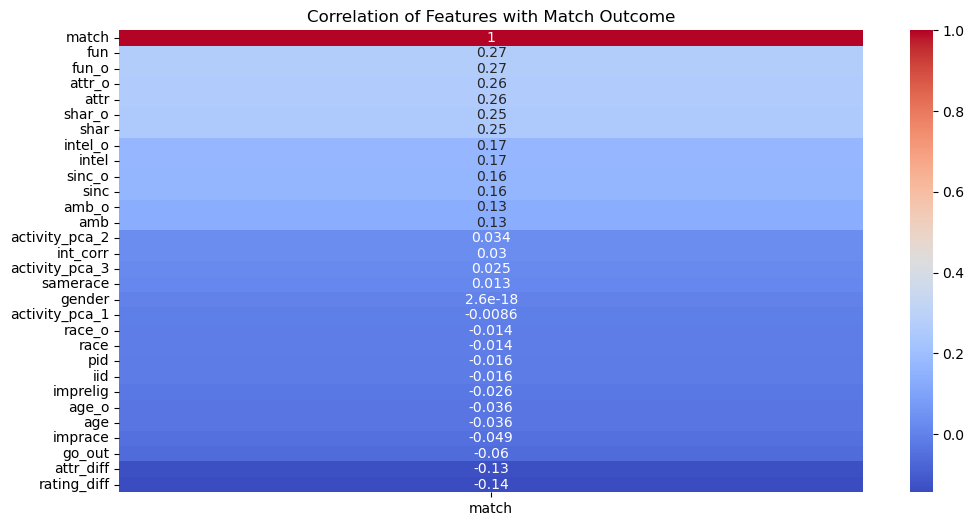

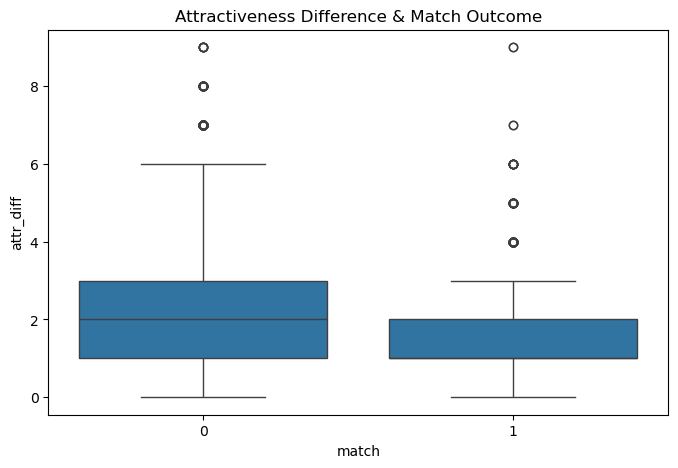

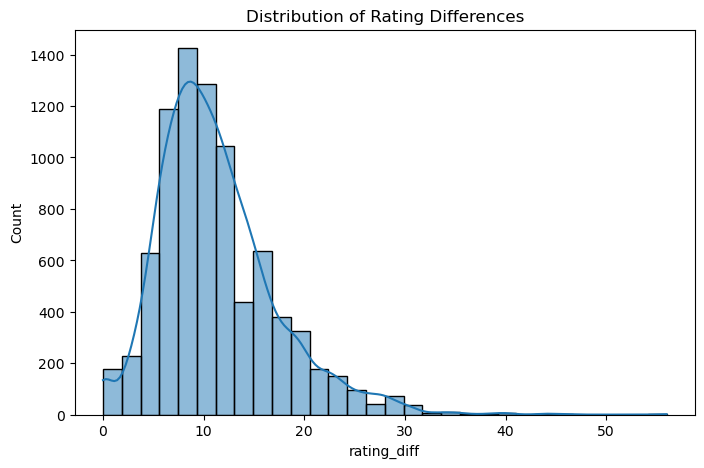

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot correlation between ratings and match outcome
plt.figure(figsize=(12, 6))
sns.heatmap(df_speed_dating_cleaned.corr()["match"].sort_values(ascending=False).to_frame(), annot=True, cmap="coolwarm")
plt.title("Correlation of Features with Match Outcome")
plt.show()

# Boxplot: How attractiveness difference affects matching
plt.figure(figsize=(8, 5))
sns.boxplot(x="match", y="attr_diff", data=df_speed_dating_cleaned)
plt.title("Attractiveness Difference & Match Outcome")
plt.show()

# Distribution of rating differences
plt.figure(figsize=(8, 5))
sns.histplot(df_speed_dating_cleaned["rating_diff"], bins=30, kde=True)
plt.title("Distribution of Rating Differences")
plt.show()

**Correlation Heatmap**

- Fun, Fun_o, Attractiveness (attr, attr_o), and Shared Interests (shar, shar_o) have the highest correlations with match.
- Personality traits (sinc, intel, amb, etc.) also show moderate correlations.
- Attractiveness Difference (attr_diff) and Overall Rating Difference (rating_diff) show negative correlations—larger differences make a match less likely.

**Boxplot: Attractiveness Difference vs. Match Outcome**
- Smaller attractiveness differences correspond to more matches (as expected).
- Larger attr_diff values indicate less likelihood of matching.

**Histogram: Rating Differences Distribution**

- Right-skewed distribution: Most rating differences are low, but some extreme cases exist.
- This confirms that perceived compatibility matters significantly.

- Lets drop low-impact features

In [35]:
cols_to_drop = ["iid", "pid", "race", "race_o", "samerace"]
df_speed_dating_cleaned.drop(columns=cols_to_drop, inplace=True)

print(f"Dataset now has {df_speed_dating_cleaned.shape[1]} columns after dropping low-impact features.")

Dataset now has 25 columns after dropping low-impact features.


- Lets Normalize the whole dataset

In [39]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Select only numeric columns (exclude categorical/binary ones like 'match', 'gender', etc.)
numeric_cols = df_speed_dating_cleaned.select_dtypes(include=['float64', 'int64']).columns

# Apply normalization
df_speed_dating_cleaned[numeric_cols] = scaler.fit_transform(df_speed_dating_cleaned[numeric_cols])

In [41]:
df_speed_dating_cleaned.describe().T[['mean', 'std']]

,mean,std
gender,0.000000e+00,1.00006
match,2.971916e-18,1.00006
int_corr,-3.608756e-17,1.00006
age_o,2.615286e-16,1.00006
attr_o,-2.054868e-16,1.00006
sinc_o,-1.358590e-17,1.00006
intel_o,1.562379e-16,1.00006
fun_o,-2.674725e-16,1.00006
amb_o,-1.783150e-17,1.00006
shar_o,6.156112e-17,1.00006


In [43]:
# displays duplicate rows
print(df_speed_dating_cleaned.isnull().sum().sum())
print(f"Duplicate Rows: {df_speed_dating_cleaned.duplicated().sum()}")

0
Duplicate Rows: 1


In [45]:
df_speed_dating_cleaned = df_speed_dating_cleaned.drop_duplicates()

In [47]:
# verify if duplicates are leftover
print(f"Duplicate Rows: {df_speed_dating_cleaned.duplicated().sum()}")

Duplicate Rows: 0


In [49]:
# Save the cleaned and normalized dataset
file_path = r"C:\Users\samue\OneDrive\Data Science and Analytics\Data 534\Data 534 Machine Learning Project\Datasets\Speed_Dating\Speed_Dating_Cleaned_Final.csv"
df_speed_dating_cleaned.to_csv(file_path, index=False)

print(f"Dataset saved successfully at: {file_path}")

Dataset saved successfully at: C:\Users\samue\OneDrive\Data Science and Analytics\Data 534\Data 534 Machine Learning Project\Datasets\Speed_Dating\Speed_Dating_Cleaned_Final.csv
